In [62]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import winsound

def beep():
    winsound.PlaySound("beep", winsound.SND_FILENAME)

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary)
    plt.axis("off")

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

In [3]:
dataset,labels = mnist['data'], mnist['target']

In [4]:
import numpy as np
labels = labels.astype(np.uint8)

In [5]:
data_train,  data_test  = dataset[:60000], dataset[60000:]
label_train, label_test = labels[:60000],  labels[60000:]

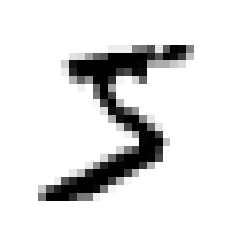

In [6]:
from numpy.random import permutation

shuffle_index = permutation(60000)# get random order of 1~60000
data_train,label_train = data_train[shuffle_index], label_train[shuffle_index]
some_digit = dataset[0]
plot_digit(some_digit)

In [7]:
from sklearn.svm import SVC
svm_clf = SVC()
svm_clf.fit(data_train, label_train)
svm_clf.predict([some_digit])
beep()

In [8]:
some_digit_scores = svm_clf.decision_function([some_digit])
print(some_digit_scores)

[[ 1.72501887  2.7280986   7.25101376  8.30763619 -0.31087316  9.31324744
   1.70975224  2.76766328  6.2304926   4.84773214]]


In [9]:
np.argmax(some_digit_scores)

5

In [10]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier())
ovo_clf.fit(data_train, label_train)
print(ovo_clf.predict([some_digit]))
beep()

[5]


In [11]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier

ovr_clf = OneVsOneClassifier(SGDClassifier())
ovr_clf.fit(data_train, label_train)
print(ovr_clf.predict([some_digit]))
beep()

[5]


In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=10000) # increase max_iter
sgd_clf.fit(data_train, label_train)
print(sgd_clf.predict([some_digit]))
beep()

[5]


In [13]:
sgd_clf.decision_function([some_digit])

array([[-19363.9674733 , -25372.85962919, -10229.93096215,
          2510.18785928, -27712.18328763,   3422.7669824 ,
        -36572.98020414, -12653.81820868,  -8790.31827472,
         -9892.81226123]])

In [14]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(sgd_clf, data_train, label_train, scoring="accuracy"))
beep()

[0.87775    0.85783333 0.85466667 0.88441667 0.86316667]


In [16]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
data_train_scaled = scalar.fit_transform(data_train.astype(np.float64))
print(cross_val_score(sgd_clf, data_train_scaled, label_train, scoring="accuracy", n_jobs=5))
beep()

[0.89966667 0.89841667 0.90058333 0.8955     0.90308333]


In [26]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

label_train_pred = cross_val_predict(sgd_clf, data_train_scaled, label_train, n_jobs=8)

array([[5574,    0,   13,    5,    8,   35,   32,    5,  250,    1],
       [   0, 6413,   43,   20,    3,   42,    4,    6,  205,    6],
       [  26,   26, 5210,   87,   69,   24,   68,   34,  405,    9],
       [  27,   20,  103, 5220,    0,  186,   22,   41,  453,   59],
       [  10,   15,   39,    9, 5202,    7,   38,   20,  361,  141],
       [  25,   17,   24,  147,   50, 4451,   77,   17,  552,   61],
       [  28,   17,   41,    2,   37,   84, 5556,    4,  149,    0],
       [  20,   12,   48,   18,   45,   13,    3, 5702,  215,  189],
       [  14,   67,   40,   93,    3,  119,   31,    9, 5435,   40],
       [  24,   20,   29,   57,  117,   35,    1,  170,  427, 5069]],
      dtype=int64)

In [56]:
conf_mx = confusion_matrix(label_train, label_train_pred)
conf_mx

array([[5574,    0,   13,    5,    8,   35,   32,    5,  250,    1],
       [   0, 6413,   43,   20,    3,   42,    4,    6,  205,    6],
       [  26,   26, 5210,   87,   69,   24,   68,   34,  405,    9],
       [  27,   20,  103, 5220,    0,  186,   22,   41,  453,   59],
       [  10,   15,   39,    9, 5202,    7,   38,   20,  361,  141],
       [  25,   17,   24,  147,   50, 4451,   77,   17,  552,   61],
       [  28,   17,   41,    2,   37,   84, 5556,    4,  149,    0],
       [  20,   12,   48,   18,   45,   13,    3, 5702,  215,  189],
       [  14,   67,   40,   93,    3,  119,   31,    9, 5435,   40],
       [  24,   20,   29,   57,  117,   35,    1,  170,  427, 5069]],
      dtype=int64)

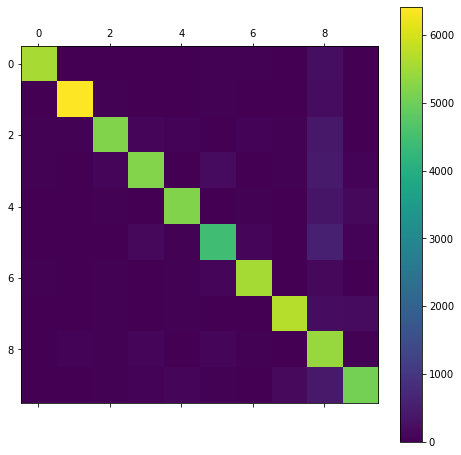

In [57]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)
    plt.show()
    
plot_confusion_matrix(conf_mx)

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

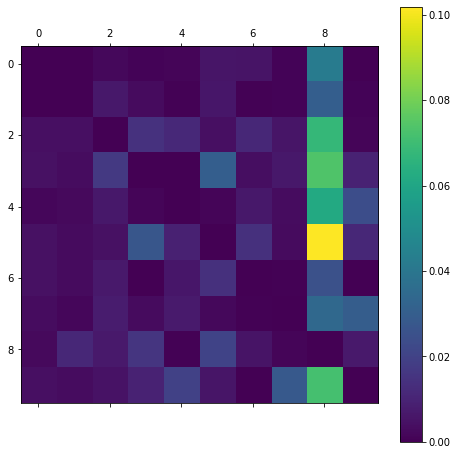

In [60]:
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)

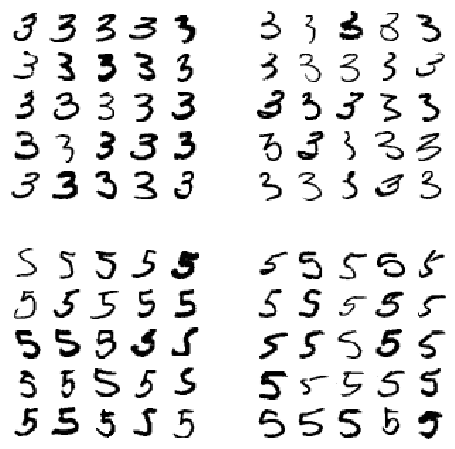

In [65]:
cl_a, cl_b = 3, 5
data_aa = data_train[(label_train == cl_a) & (label_train_pred == cl_a)]
data_ab = data_train[(label_train == cl_a) & (label_train_pred == cl_b)]
data_ba = data_train[(label_train == cl_b) & (label_train_pred == cl_a)]
data_bb = data_train[(label_train == cl_b) & (label_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(data_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(data_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(data_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(data_bb[:25], images_per_row=5)
plt.show()

In [66]:
from sklearn.neighbors import KNeighborsClassifier

label_train_large = (label_train >= 7)
label_train_odd = (label_train % 2 == 1)
label_multilabel = np.c_[label_train_large, label_train_odd]

knn_clf = KNeighborsClassifier(n_jobs=6)
knn_clf.fit(data_train, label_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=6, n_neighbors=5, p=2,
                     weights='uniform')

array([[False,  True]])

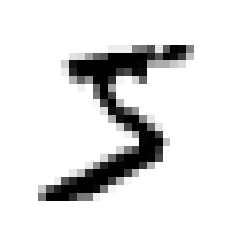

In [69]:
plot_digit(some_digit)
knn_clf.predict([some_digit])

In [71]:
from sklearn.metrics import f1_score

label_train_knn_pred = cross_val_predict(knn_clf, data_train, label_multilabel, n_jobs=6)
f1_score(label_multilabel, label_train_knn_pred, average="macro")

0.9787598678853473